In [1]:
import warnings
warnings.filterwarnings("ignore")
from run import main
import matplotlib.pyplot as plt
plt.set_loglevel('WARNING')

In [2]:
# set up dataframe for collecting event data
"""
    start_time: the start time of the simulation (can only be used when you have saved state at that given timestamp)
    finish_time: the total simulation time
    checkpoints: a list of simulation timestamp for state saving e.g. [1000, 5000, 7000]
    scheme: simultaneously, randomly, alternatively
"""
SIM_TIME = 1000
scheme = 'alternatively'
time_network, adversary = main(finish_time=SIM_TIME, scheme=scheme)

Adversary: Start SCAN_HOST at 0.0s.
MTD: CompleteTopologyShuffle triggered 0.0s
MTD: CompleteTopologyShuffle deployed in the network at 0.0s.
Adversary: Processed SCAN_HOST at 10.0s.
Adversary: Start ENUM_HOST at 10.0s.
Adversary: Processed ENUM_HOST at 25.0s.
Adversary: Start SCAN_PORT at 25.0s.
MTD: HostTopologyShuffle triggered 30.2s
MTD: HostTopologyShuffle suspended at 30.2s due to resource occupation
Adversary: Processed SCAN_PORT at 45.0s.
Adversary: Start EXPLOIT_VULN at 45.0s.
MTD: CompleteTopologyShuffle finished in 50.2s at 50.2s.
MTD: Interrupted EXPLOIT_VULN at 50.2s!
Adversary: Restarting with SCAN_HOST at 52.2s!
Adversary: Start SCAN_HOST at 52.2s.
MTD: HostTopologyShuffle triggered 61.1s
MTD: HostTopologyShuffle deployed in the network at 61.1s.
Adversary: Processed SCAN_HOST at 62.2s.
Adversary: Start ENUM_HOST at 62.2s.
Adversary: Processed ENUM_HOST at 77.2s.
Adversary: Start SCAN_PORT at 77.2s.
MTD: IPShuffle triggered 91.1s
MTD: IPShuffle suspended at 91.1s due to 

In [3]:
mtd_stats = time_network.get_mtd_stats()
attack_stats = adversary.get_attack_stats()

mtd_stats.save_record(sim_time=SIM_TIME, scheme=scheme)
attack_stats.save_record(sim_time=SIM_TIME, scheme=scheme)

In [4]:
# print(time_network.get_mtd_stats().dict())
mtd_stats.get_record().head()

,name,start_time,finish_time,duration,executed_at
0,CompleteTopologyShuffle,0.000000,50.245620,50.245620,network
1,HostTopologyShuffle,61.080046,106.707847,45.627801,network
2,IPShuffle,121.275856,161.884539,40.608683,network
3,OSDiversity,151.629846,186.813181,35.183335,application
4,PortShuffle,212.650678,244.187285,31.536606,application


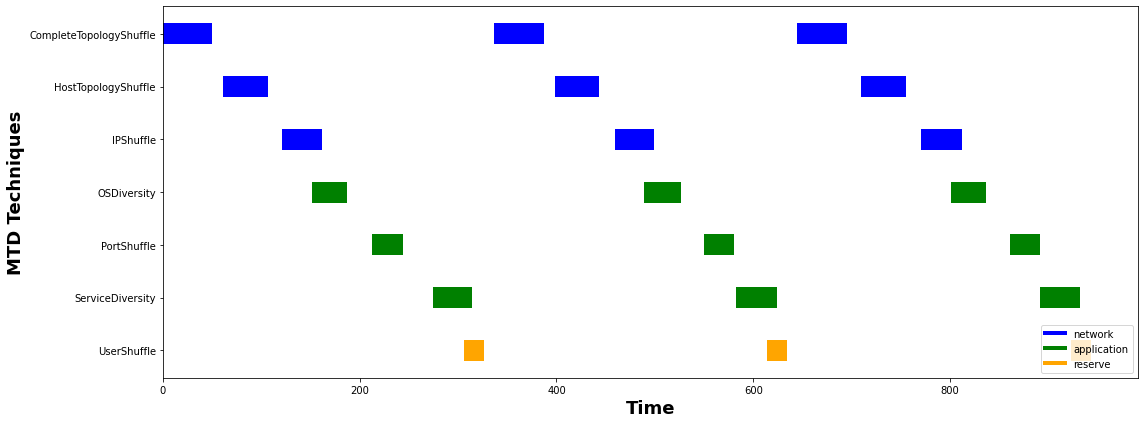

In [5]:
mtd_stats.visualise_mtd_operation(scheme=scheme)

In [6]:
attack_stats.get_record().head()

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by
0,SCAN_HOST,0.00000,10.00000,10.00000,-1,0,0,0,None,[],None,None
1,ENUM_HOST,10.00000,25.00000,15.00000,-1,0,0,0,None,[],None,None
2,SCAN_PORT,25.00000,45.00000,20.00000,0,1,0,0,None,[],None,None
3,EXPLOIT_VULN,45.00000,50.24562,5.24562,0,1,0,0,None,[],network,CompleteTopologyShuffle
4,SCAN_HOST,52.24562,62.24562,10.00000,-1,0,0,0,None,[],None,None


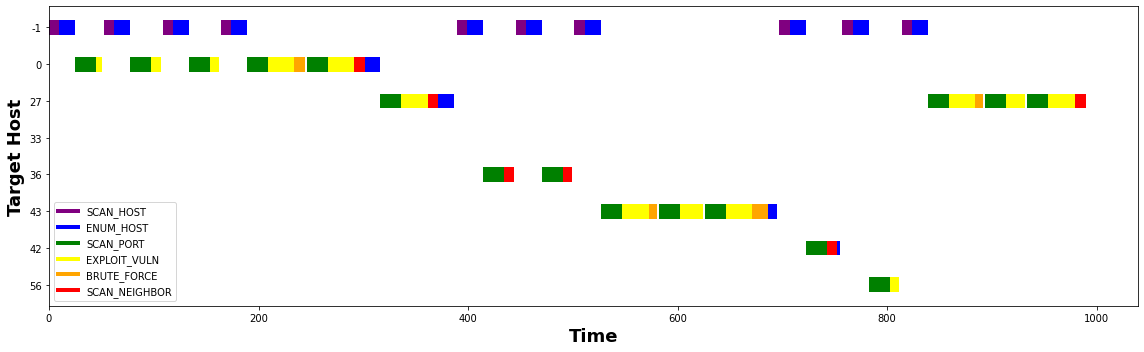

In [7]:
attack_stats.visualise_attack_operation_group_by_host()

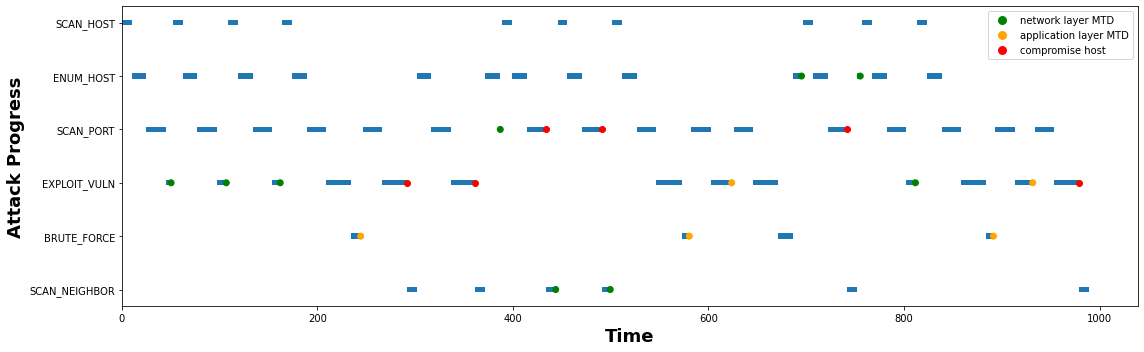

In [8]:
attack_stats.visualise_attack_operation()

In [9]:
attack_stats.compromised_record_by_attack_action('SCAN_PORT')

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by
28,SCAN_PORT,413.988486,433.988486,20.0,36,1,32,2,36,"[Eba, Elka, Philipa, Aretha]",None,None
32,SCAN_PORT,470.718558,490.718558,20.0,36,2,32,3,36,"[Becka, Jsandye, Jessi, Papagena]",None,None
47,SCAN_PORT,722.162480,742.162480,20.0,42,1,45,4,42,"[Ermengarde, Kial, Mariquilla]",None,None


In [10]:
attack_stats.compromised_record_by_attack_action('EXPLOIT_VULN')

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by
18,EXPLOIT_VULN,266.187285,291.373726,25.186441,0,4,14,0,0,"[Rhody, Pammie, Consolata, Ericha, Jorie]",None,None
22,EXPLOIT_VULN,336.373726,361.421517,25.047791,27,1,23,1,27,"[Kasey, Maye, Deana, Ted, Shayla]",None,None
62,EXPLOIT_VULN,953.709629,979.495492,25.785863,27,2,60,5,27,"[Zonnya, Laura, Melinde, Jaquith]",None,None


In [11]:
attack_stats.compromised_record_by_attack_action('BRUTE_FORCE')

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by
